In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import square
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft2, fftshift, ifft2 # Python DFT
%matplotlib inline


### New functions we will use in this module

| Function Name            | What it does |
| - | - |
| scipy.optimize.minimize  | Find the set of parameters that minimize a cost function |


# Fourier Transform for 2D Images

So far in today's lesson we have applied Fourier transform analysis to 1D signals that vary in time, and the resulting frequency space distributions gave us insight into the wave-like components that make up these signals. It turns out that these methods can be extended to domains other than time, and in particular we can use the same mathematical techniques to study periodic structures in two-dimensional images. Just like in the 1D case, Fourier transforms for image processing has widespread  applications in all kinds of different fields, and we will use this version of the transform to decipher properties of electrons on the surface of atomically flat, cryogenically cooled metal surface. But before we get to the electrons, lets try to develop intuition for how the Fourier transform works in 2D.

Let's start like we did before with a simple example.

## Plane Wave

The equivalent of a single-frequency sine wave in 2D is a waveform that varies periodically on one axis and remains constant in another. This is called a plane wave, and we can decompose any 2D image into its constituent plane waves with varying amplitude and frequency just as we did in the 1D case. What is new here is now these plane waves also can differ in the direction that they are oriented. We show a few examples of different plane waves and their corresponding 2D Fourier transforms.

### Horizontal plane wave


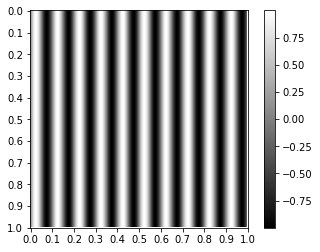

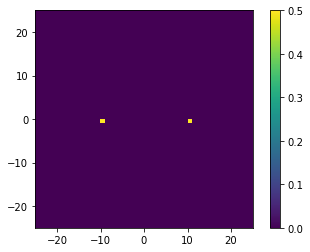

In [2]:
hW, hH = 100, 100
hFreq = 10

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)

A = np.sin(2*np.pi*hFreq*X)

plt.imshow(A, cmap = 'gray');
plt.colorbar();
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
H,W = np.shape(A)

plt.figure();
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);
plt.colorbar();

### Sum of horizontal and vertical plane waves

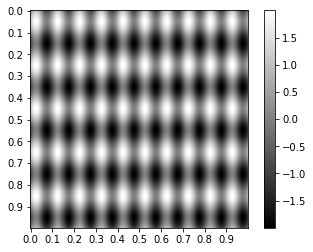

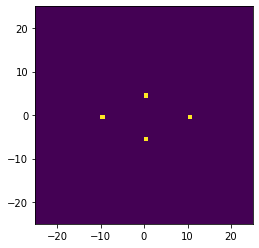

In [3]:
hFreq = 10
vFreq = 5

A1 = np.sin(2*np.pi*hFreq*X) + np.sin(2*np.pi*vFreq*Y)

plt.figure()
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
plt.imshow(A1, cmap = 'gray');
plt.colorbar();

F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1)
P1 = np.abs(F1)

plt.figure()
plt.imshow(P1);

plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

### Diagonal plane wave

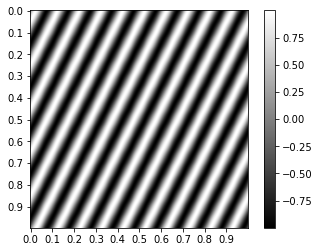

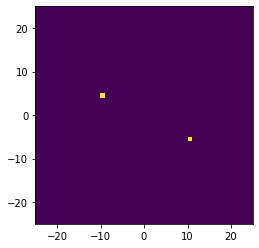

In [4]:
A2 = np.sin(hFreq*2*np.pi*X + vFreq*2*np.pi*Y);

plt.figure()
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)]);
plt.imshow(A2, cmap = 'gray');
plt.colorbar();


F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

plt.figure()
plt.imshow(P2[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);


# Questions for Discussion

5.1 One key difference between the Fourier transform of time-based signals and 2D images is that the data in each case is a function of different dimensions: time and space, respectively. If time is transformed into frequency for 1D signals, then what do you think are the units of the corresponding "spatial frequency"?

5.2 We also have to consider the direction of the plane waves, so now we describe each possible wave not as a single frequency but as a vector with two values. We call this quantity the "wavevector," and in each example above the wavevector points from the origin to the points with non-zero amplitude (the yellow dots). Why are there two wavevectors for a single plane wave? Hint: consider the reflection symmetry of the plane wave in the original image.

# Plane Waves in Electronic Materials

Disclaimer: a lot of the theoretical background below is advanced for this class, and the lab will try to simply explain difficult concepts to the level that you can proceed with the analysis. If anything is confusing to you feel free to ask, but don't worry about fully understanding everything. Those who are interested should definitely take a solid state physics course in the future!

It turns out that there is a fundamental connection between plane waves and electrons in a solid material. Electrons in a metal have the unique property that they are not confined to the nuclues of the atoms in the solid but can travel freely through the material. These "free" electrons also exist on the surface of the metal, and the best description of these particles is not as point objects but rather as plane wave states with a particular wavevector. This is a direct example of the "wave-particle duality" you may have heard of in Quantum Mechanics. 

In a real metal with a huge number of electrons, the plane waves smear together into what is called an "electron gas", with the wavelength of these plane waves on the order of nanometers long. Because they are so small and numerous, the electrons aren't seen on an individual level but rather as a fluctuating electronic density throughout space. One way to visualize the two-dimensional electron gas (2DEG) on the surface of a metal is using Scanning Tunneling Microscopy (STM), an imaging technique that relies on the quantum-mechanical nature of the surface electrons to image the electronic density with spatial resolution on the single atom level. This is accomplished by precisely moving a metallic tip across the sample surface close enough that some electrons will pass from the sample to the tip or vice versa with an applied voltage, creating a very tiny current. We can relate changes in this current between the sample and the tip to changes in the electronic density at each point we place the tip, effectively imaging the electron gas. An example of such a scan is below.

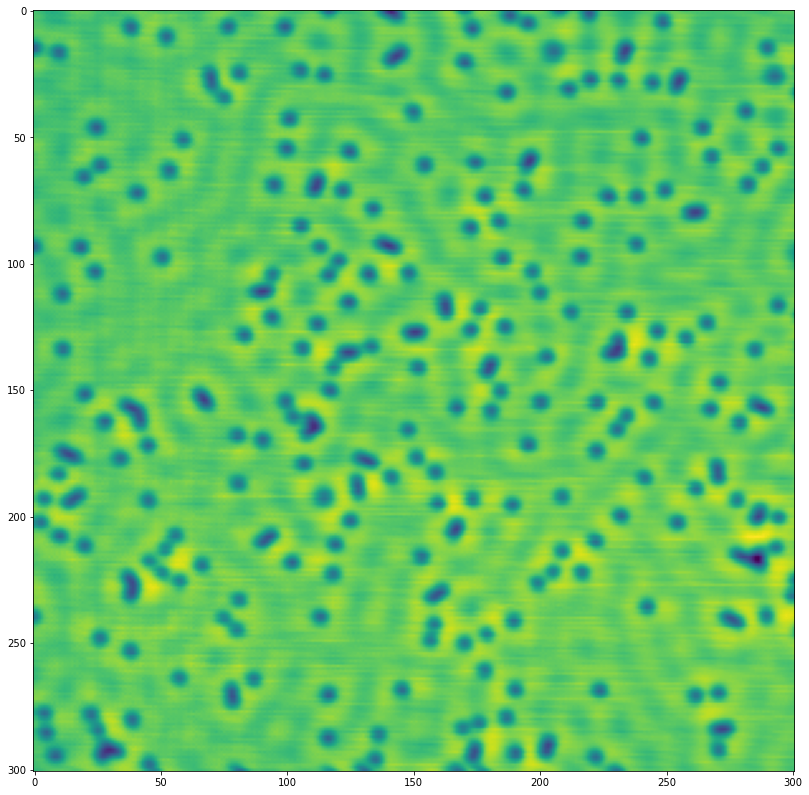

In [5]:
messy_2DEG = np.loadtxt("messy_topo.txt", delimiter=',');

plt.figure(figsize = (14,14))
plt.imshow(messy_2DEG);

The image you are looking at is the surface of a Copper sample specifically designed to be atomically flat and dosed with various defects. The black dots are individual Carbon Monoxide (CO) molecules, and the space between them is occupied by the electronic plane waves on the surface. Notice that the electronic density is not constant but has oscillations that are indicative of their plane wave nature. 

Importantly, these ripples become pronounced by the scattering of electrons off of these CO defects, leading to interference patterns similar to those created by throwing rocks in a body of water and observing how the waves collide. And just as how the size and frequency of ripples created by rocks in water can provide information about the properties of water (for example the surface tension), so can the frequency of ripples in the electron gas teach us about the fundamental electronic properties of Copper. Without getting into the details, we can relate the spatial frequency of the electronic ripples to the highest allowed energy states of the surface electrons, a property known as the material's "Fermi Energy." The corresponding wavevector corresponding to this highest energy is the Fermi Wavevector, and it can be shown that the electrons scattering off of defects are primarily described by plane waves with this wavevector. Because the Fourier transform is suited to analyzing periodic structures, we should expect to find some use for it in this analysis.

Let's begin by loading and visualizing a cleaner portion of the Copper surface.

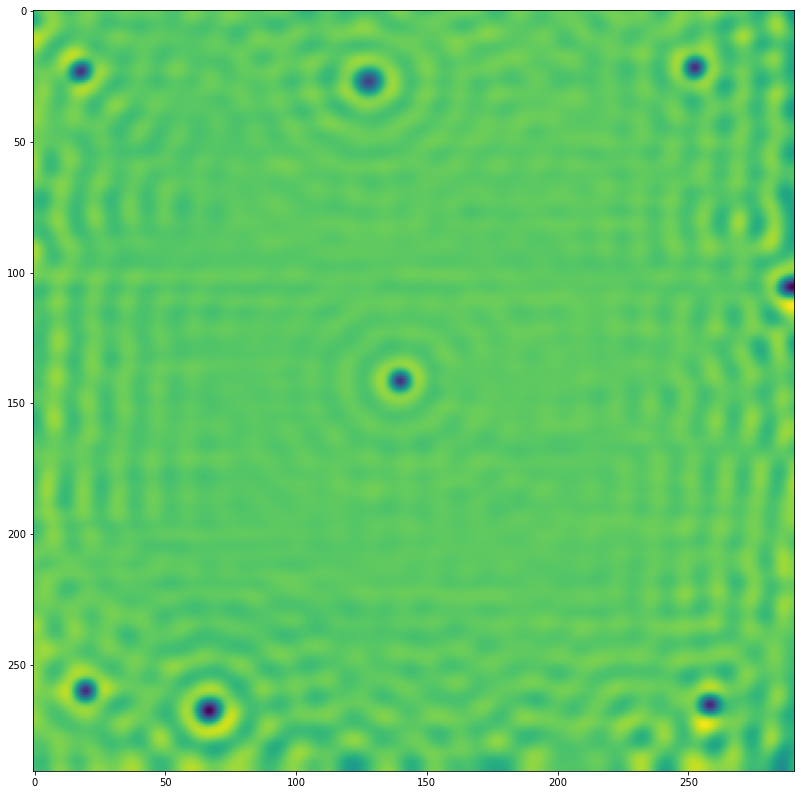

In [6]:
empty_2DEG = np.loadtxt("empty_topo.txt", delimiter=',')
defect_2DEG = np.loadtxt("defect_topo.txt", delimiter=',')

diff_map = defect_2DEG - empty_2DEG;

plt.figure(figsize = (14,14))
plt.imshow(defect_2DEG);

In this image it is much easier to see oscillations due to individual defects. We can now take the Fourier Transform of this image to try to uncover the periodicity of the ripples we can see.

# Question for discussion

6.1 Before you run the code below that takes the Fourier transform of the above image, what form do you expect the transformed image to have? Make your best guess, and justify your answer. Hint: again, think of the symmetries involved.

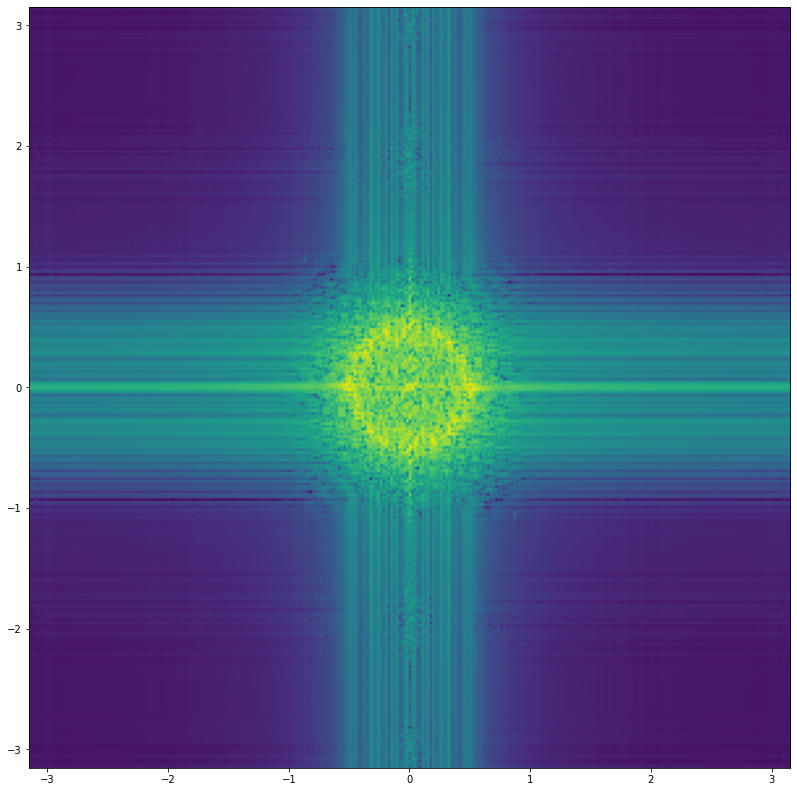

In [7]:
F_defect = fft2(defect_2DEG);                        
F_defect = fftshift(F_defect)
P2 = np.abs(F_defect)
P2 = np.log(P2+1);

plt.figure(figsize = (14,14))
plt.imshow(P2, extent=[-3.153, 3.153, -3.153, 3.153]);


# Question for discussion

6.2 Now that you have seen the transformed signal, can you relate the features of the Fourier transform to the original image? In particular, contrast features corresponding to the ripples off of defects to those that are due to the surrounding electronic environment.

Clearly, the original image suffers from too much noise to adequately study the the ripples in isolation. One way to circumvent the environmental noise is to subtract the effect of the background before taking the Fourier transform and only retain the effect of the defect. This can be accomplished by a more advanced STM technique whereby the scanning tip not only images the surface but can also manipulate individual particles. and move them on the surface. We thus can move the central defect and scan so that we have the real space electronic ripples due to all of the environmental effects.

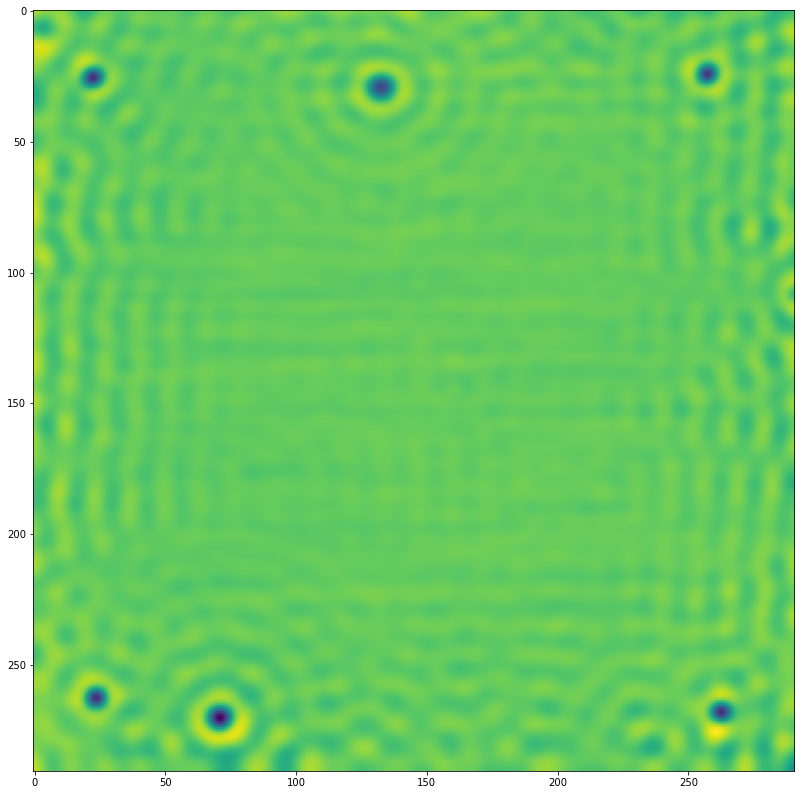

In [9]:
plt.figure(figsize = (14,14))
plt.imshow(empty_2DEG);

Now that we have the original map with and without the central defect, we can normalize both maps and take the difference to acquire just the effect of the central defect on the electronic density.

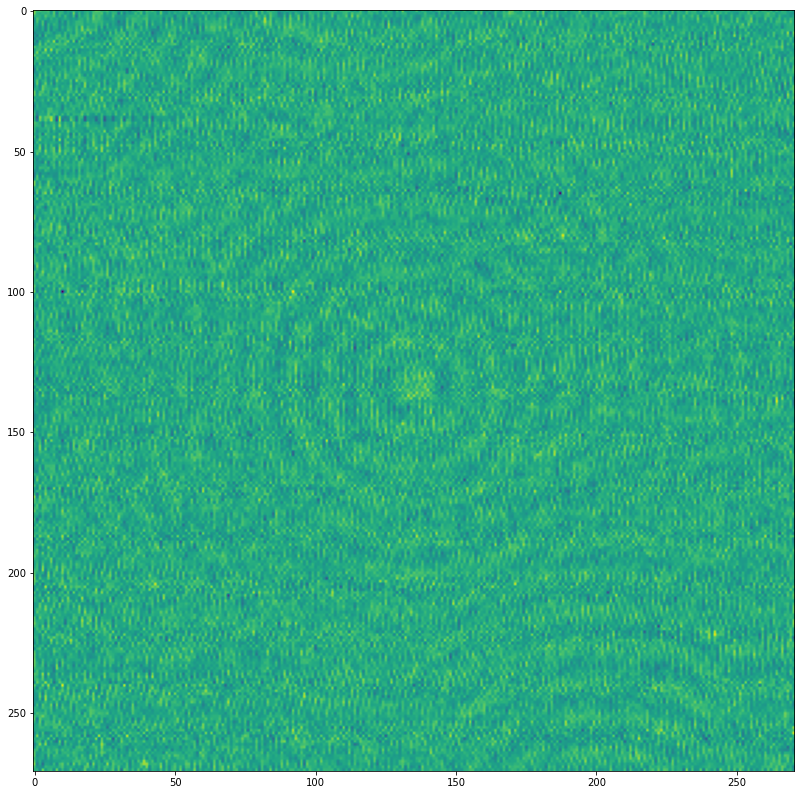

In [10]:
diff_map = np.loadtxt("diff_map.txt", delimiter=',')

plt.figure(figsize = (14,14))
plt.imshow(diff_map);

Although weaker in amplitude, this new image will have a much clearer Fourier transform.

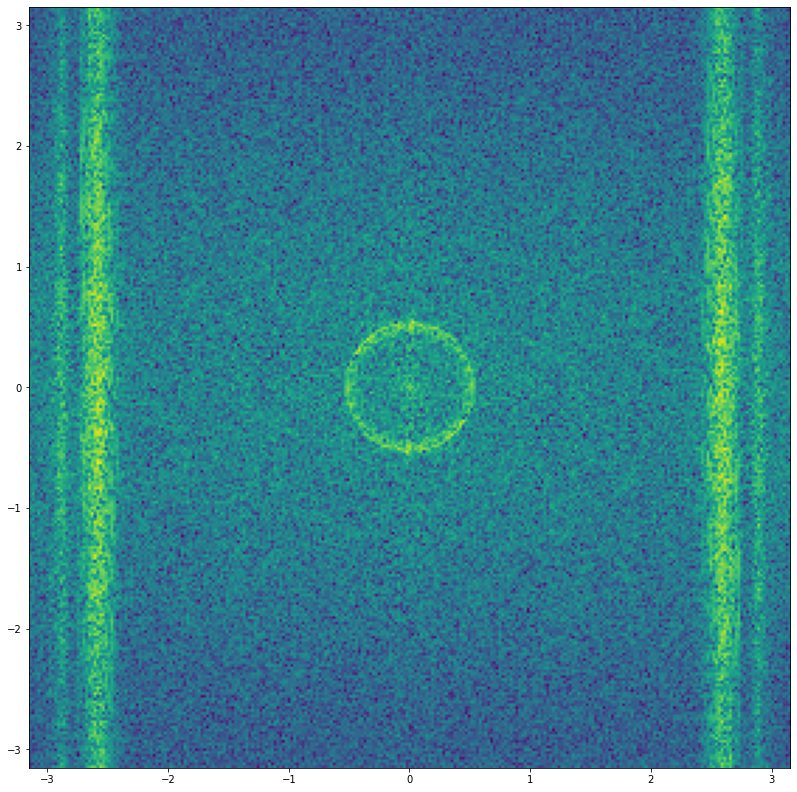

In [11]:
F_diff = fft2(diff_map);                        
F_diff = fftshift(F_diff)
P2 = np.abs(F_diff)
P2 = np.log(P2+1);

plt.figure(figsize = (14,14))
plt.imshow(P2, extent=[-3.153, 3.153, -3.153, 3.153]);

This circular Fourier space image is a direct visualization of the electronic energy levels on the surface of Copper. 